# Women in Comic Books

Predicting the Prominence of Female Heroes in the future

## Load Libraries 

In [1]:
#Import Python Libraries
import pandas as pd
import matplotlib.pyplot as pyplot 
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics
from sklearn import preprocessing
import numpy as np

## Import Data Sets 

In [2]:
#Read csv file
marvel = pd.read_csv('../data/marvel-wikia-data.csv')

In [3]:
#Read csv file
dc = pd.read_csv("../data/dc-wikia-data.csv")

In [4]:
# Reset marvel year column to all caps YEAR so to keep the column names cohesive
marvel['YEAR'] = marvel['Year']

## Setting new Data frames

In [5]:
# Marvel DataFrame with name, ID, Alignment, eye color, hair color, sex, alive status, appearances, and year
marvel = pd.DataFrame(marvel, columns = ['name' , 'SEX', 'APPEARANCES', 'EYE', 'YEAR'])

# Create a new column named Universe and set all the column to DC
marvel['Universe'] = 'Marvel'

marvel.head()

,name,SEX,APPEARANCES,EYE,YEAR,Universe
0,Spider-Man (Peter Parker),Male Characters,4043.0,Hazel Eyes,1962.0,Marvel
1,Captain America (Steven Rogers),Male Characters,3360.0,Blue Eyes,1941.0,Marvel
2,"Wolverine (James \""Logan\"" Howlett)",Male Characters,3061.0,Blue Eyes,1974.0,Marvel
3,"Iron Man (Anthony \""Tony\"" Stark)",Male Characters,2961.0,Blue Eyes,1963.0,Marvel
4,Thor (Thor Odinson),Male Characters,2258.0,Blue Eyes,1950.0,Marvel


In [6]:
# DC DataFrame with name, ID, Alignment, eye color, hair color, sex, alive status, appearances, and year
dc = pd.DataFrame(dc, columns = ['name' , 'SEX', 'APPEARANCES', 'EYE','YEAR'])

# Create a new column named Universe and set all the column to DC
dc['Universe'] = 'DC'
dc.head()

,name,SEX,APPEARANCES,EYE,YEAR,Universe
0,Batman (Bruce Wayne),Male Characters,3093.0,Blue Eyes,1939.0,DC
1,Superman (Clark Kent),Male Characters,2496.0,Blue Eyes,1938.0,DC
2,Green Lantern (Hal Jordan),Male Characters,1565.0,Brown Eyes,1940.0,DC
3,James Gordon (New Earth),Male Characters,1316.0,Brown Eyes,1939.0,DC
4,Richard Grayson (New Earth),Male Characters,1237.0,Blue Eyes,1940.0,DC


## Making one large Data frame

In [7]:
# ignore_index means it will reassign new indexes
comicCharacters = pd.concat([marvel, dc], ignore_index = True, sort = False)

In [8]:
# Get a dataframe with only female heroes indexes  
femaleComicCharacters = comicCharacters[comicCharacters['SEX'] ==  'Female Characters']
femaleComicCharacters.dropna(subset = ['YEAR'], inplace=True) 
femaleComicCharacters.dropna(subset = ['EYE'], inplace=True) 
femaleComicCharacters.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,SEX,APPEARANCES,EYE,YEAR,Universe
11,Susan Storm (Earth-616),Female Characters,1713.0,Blue Eyes,1961.0,Marvel
13,Ororo Munroe (Earth-616),Female Characters,1512.0,Blue Eyes,1975.0,Marvel
17,Mary Jane Watson (Earth-616),Female Characters,1304.0,Green Eyes,1965.0,Marvel
24,Wanda Maximoff (Earth-616),Female Characters,1161.0,Green Eyes,1964.0,Marvel
26,Janet van Dyne (Earth-616),Female Characters,1120.0,Blue Eyes,1963.0,Marvel


In [9]:
#Counting the number of eye colors
femaleEyeCount = femaleComicCharacters['EYE'].value_counts()

In [10]:
femaleComicCharacters['YEAR'].astype(str)

11       1961.0
13       1975.0
17       1965.0
24       1964.0
26       1963.0
27       1963.0
28       1964.0
31       1962.0
32       1980.0
33       1968.0
34       1980.0
35       1980.0
45       1976.0
55       1963.0
59       1944.0
67       1965.0
75       1977.0
77       1982.0
78       1962.0
79       1968.0
82       1964.0
84       1989.0
88       1982.0
90       1965.0
91       1965.0
93       1975.0
101      1978.0
102      1971.0
104      1970.0
105      1980.0
          ...  
23104    1993.0
23108    1993.0
23123    1991.0
23128    1991.0
23132    1991.0
23140    1989.0
23142    1989.0
23146    1989.0
23148    1988.0
23154    1988.0
23155    1988.0
23160    1987.0
23163    1987.0
23177    1985.0
23181    1984.0
23182    1984.0
23183    1984.0
23194    1982.0
23198    1982.0
23201    1981.0
23209    1981.0
23210    1981.0
23215    1980.0
23218    1978.0
23234    1968.0
23237    1968.0
23249    1965.0
23257    1944.0
23258    1941.0
23261    1940.0
Name: YEAR, Length: 2940

In [11]:
# setting the year as a whole number 
years = pd.to_numeric(femaleComicCharacters['YEAR']).notnull()
femaleComicCharacters['YEAR'].loc[years] = femaleComicCharacters['YEAR'].loc[years].astype(int)
femaleComicCharacters.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,name,SEX,APPEARANCES,EYE,YEAR,Universe
11,Susan Storm (Earth-616),Female Characters,1713.0,Blue Eyes,1961,Marvel
13,Ororo Munroe (Earth-616),Female Characters,1512.0,Blue Eyes,1975,Marvel
17,Mary Jane Watson (Earth-616),Female Characters,1304.0,Green Eyes,1965,Marvel
24,Wanda Maximoff (Earth-616),Female Characters,1161.0,Green Eyes,1964,Marvel
26,Janet van Dyne (Earth-616),Female Characters,1120.0,Blue Eyes,1963,Marvel


In [12]:
#femaleComicCharacters['year'] = pd.to_datetime(femaleComicCharacters['YEAR']) + pd.to_timedelta(np.arange(10), 'D')

## Organizing the Data frame

In [13]:
# Sort the rows of comicCharacters by column 'Year'
femaleComicCharacters = femaleComicCharacters.sort_values(by ='YEAR' )
print("Contents of Sorted Dataframe based on a single column 'YEAR' : ")
femaleComicCharacters.head()

Contents of Sorted Dataframe based on a single column 'YEAR' : 


,name,SEX,APPEARANCES,EYE,YEAR,Universe
18312,Lady of the Lake (New Earth),Female Characters,13.0,Blue Eyes,1936,DC
18605,Rose Psychic (New Earth),Female Characters,11.0,Black Eyes,1937,DC
16390,Lois Lane (New Earth),Female Characters,934.0,Blue Eyes,1938,DC
17843,Julie Madison (New Earth),Female Characters,18.0,Blue Eyes,1939,DC
16874,Martha Roberts (New Earth),Female Characters,60.0,Brown Eyes,1939,DC


## Setting the Time Series

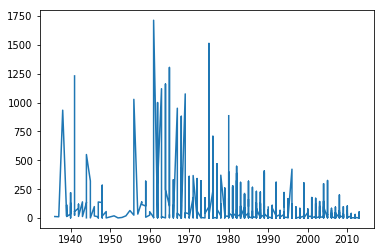

In [14]:
# ploting the data to get a feel for it
pyplot.plot(femaleComicCharacters['YEAR'], femaleComicCharacters['APPEARANCES'])
pyplot.show()

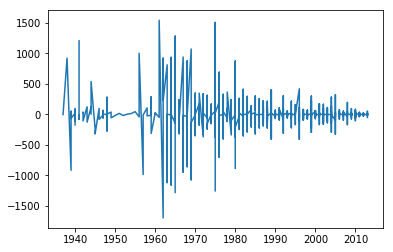

In [15]:
# Now to eneact Differencing so to balance the data 
diffFemaleCC = femaleComicCharacters['APPEARANCES'].diff()
pyplot.plot(femaleComicCharacters['YEAR'], diffFemaleCC)
pyplot.show()

### The above graph is showing that the data is more stationary after the differenecing

## Modeling the Time Series

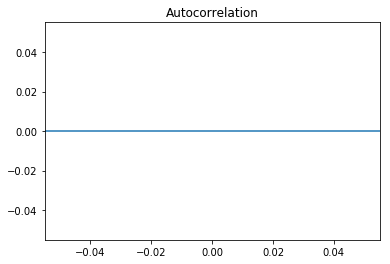

In [27]:
# using the ARIMA
# ACF plot
plot_acf(diffFemaleCC)
pyplot.show()

KeyboardInterrupt: 

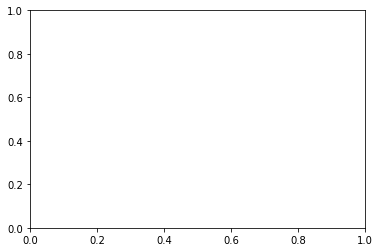

In [28]:
# PACF plot
plot_pacf(diffFemaleCC)
pyplot.show()

In [ ]:
# Try the ARIMA modeleing
ARMA_model = ARIMA(diffFemaleCC, order(5,2,1).fit(transparams=False))

In [ ]:
# The predition model based off the above model
ARMA_predict = ARMA_model.predict()